## <div style = "background-color:#6b705c;padding:10px;"><span style="color:pink"><b>2602454 : Model คาดการณ์ราคาน้ำมัน</b></span></div>

<img src = "https://github.com/pitcha555/ML_hellohack/blob/main/oil_cover.jpg?raw=true" width = 1300>

[เข้าชมแหล่งที่มาของรูปภาพ (คลิก)](https://www.nationtv.tv/news/378848877)
## student name / id : 
`นางสาว กานต์พิชชา อำนรรฆกิตติกุล 6241011426`

`นางสาว ณัฐนรี กิจบารมี 6241061826`

`นาย เมธาสิทธิ์ จิตรอารี 6241181426`

`นางสาว ศิริเลิศ ศรีประโมทย์ 6241213926`

`นาย อริยะ บุญศรี 6241248926`


## Github : https://github.com/pitcha555/ML_hellohack

## <div style = "background-color:#6b705c;padding:10px;"><span style="color:lavender"><b>บทนำ</b></span></div>
ในปัจจุบันราคาน้ำมันนั้นได้เพิ่มสูงขึ้นจากหลายๆปัจจัย ไม่ว่าจะเป็นการที่เกิดความขัดแย้งระหว่างประเทศรัสเซีย-ยูเครน และสหรัฐ ซึ่งเป็นประเทศผู้ผลิตน้ำมันรายสำคัญของโลก การที่กลุ่มประเทศ OPEC ซึ่งเป็นผู้ส่งออกน้ำมันรายใหญ่ได้ลดกำลังการผลิตน้ำมันลง(ในปี 2020) และ การที่เศรษฐกิจเริ่มฟื้นตัวจากสถานการณ์โควิด-19 ที่ยืดเยื้อมากว่า 2 ปี ทำให้ความต้องการบริโภคน้ำมันสูงเกินกว่ากำลังการผลิต ดังนั้นทางเราจึงได้ลองสร้าง model ขึ้นมาคาดการณ์ราคาน้ำมันในอนาคต ดังนี้ 

## <div style = "background-color:#6b705c;padding:10px;"><span style="color:lavender"><b>หัวข้อ</b></span></div>

## คาดการณ์ราคาน้ำมันสำเร็จรูปในระยะสั้น(รายเดือน)
* เปรียบเทียบความสัมพันธ์ของตัวแปร (pairplot)
* สร้างโมเดล (LinearRegression)
* เช็คค่านัยสำคัญทางสถิติ (statmodel)



## คาดการณ์ราคาน้ำมันสำเร็จรูปในระยะยาว(รายปี)
* เปรียบเทียบความสัมพันธ์ของตัวแปร (pairplot)
* สร้างโมเดล (LinearRegression)
* เช็คค่านัยสำคัญทางสถิติ (statmodel)

## คาดการณ์ราคาน้ำมันสำเร็จรูป 5 ปีข้างหน้า โดยใช้ Facebook Prophet
* สร้างโมเดล(Phophet)
* เปรียบเทียบค่าที่ได้

## คาดการณ์ค่าเงินเฟ้อ 5 ปีข้างหน้า โดยใช้ Facebook Prophet
* สร้างโมเดล(Phophet)
* เปรียบเทียบค่าที่ได้
  
## คาดการณ์ค่าเงินเฟ้อโดยใช้ราคาน้ำมันสำเร็จรูปในอนาคต
* สร้างโมเดล (LinearRegression)
* คาดการณ์ค่าเงินเฟ้อ
* เปรียบเทียบค่าที่ได้

---

In [2]:
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from pprint import pprint
from fbprophet import Prophet

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## <div style = "background-color:#6b705c;padding:10px;"><span style="color:lavender"><b>คาดการณ์ราคาน้ำมันสำเร็จรูปในระยะสั้น(รายเดือน)</b></span></div>

เพื่อศึกษาความสัมพันธ์และคาดการณ์ราคาน้ำมันสำเร็จรูปในระยะสั้น(รายเดือน) ทางเรามีสมมุติฐานที่ว่าตัวแปร ราคาน้ำมันดิบ (crude oil price) อุปสงค์ของน้ำมัน (oil demand) อุปทานของน้ำมัน (oil supply) และ
การกักตุนน้ำมัน (spare oil) นั้นเป็นตัวแปรที่ส่งผลต่อราคาน้ำดีเซล (diesel price)

In [3]:
p_price = pd.read_csv(
    'https://github.com/pitcha555/ML_hellohack/raw/main/oil_price_y.csv', parse_dates=['date'])
p_price_ds = p_price.drop('gasohol95_price', axis=1)
p_price_ds[:5]

,date,diesel_price
0,2015-01-31,25.79
1,2015-02-28,26.22
2,2015-03-31,27.04
3,2015-04-30,25.34
4,2015-05-31,26.07


In [4]:
c_price = pd.read_csv(
    'https://github.com/pitcha555/ML_hellohack/raw/main/Crude_Oil_Price.csv', parse_dates=['date'])
c_price[:5]


,date,dubai_crude_oil_price
0,2015-01-31,45.57
1,2015-02-28,55.44
2,2015-03-31,54.66
3,2015-04-30,58.55
4,2015-05-31,63.56


In [5]:
demand = pd.read_csv(
    'https://github.com/pitcha555/ML_hellohack/raw/main/oil_demand.csv', parse_dates=['date'])
demand.drop('month', axis=1, inplace=True)
demand['demand'] = pd.to_numeric(
    demand['demand'].str.replace(r'[^\d]', '', regex=True))
demand['demand'] = demand['demand']/1000000
demand = demand.round(2)
demand[:5]


,date,demand
0,2015-01-31,1.33
1,2015-02-28,1.36
2,2015-03-31,1.32
3,2015-04-30,1.30
4,2015-05-31,1.33


In [6]:
supply = pd.read_csv(
    'https://github.com/pitcha555/ML_hellohack/raw/main/oil_production(supply).csv', parse_dates=['date'])
supply[:5]


,date,supply
0,2015-01-31,2.84
1,2015-02-28,2.85
2,2015-03-31,2.86
3,2015-04-30,2.89
4,2015-05-31,2.90


In [7]:
spare = pd.read_csv(
    'https://github.com/pitcha555/ML_hellohack/raw/main/spare_oil.csv', parse_dates=['date'])
spare[:5]


,date,spare_oil
0,2015-01-31,2.380322
1,2015-02-28,2.279944
2,2015-03-31,1.879726
3,2015-04-30,1.860331
4,2015-05-31,1.600471


## เปรียบเทียบความสัมพันธ์ของตัวแปร (pairplot)
* ราคาน้ำมันดีเซล (diesel price)
* ราคาน้ำมันดิบ (crude oil price)
* อุปสงค์ของน้ำมัน (oil demand)
* อุปทานของน้ำมัน (oil supply)
* การกักตุนน้ำมัน (spare oil)


In [8]:
df1 = pd.concat([p_price_ds, c_price.drop('date', axis=1), demand.drop(
    'date', axis=1), supply.drop('date', axis=1), spare.drop('date', axis=1)], axis=1)
df1[:5]


,date,diesel_price,dubai_crude_oil_price,demand,supply,spare_oil
0,2015-01-31,25.79,45.57,1.33,2.84,2.380322
1,2015-02-28,26.22,55.44,1.36,2.85,2.279944
2,2015-03-31,27.04,54.66,1.32,2.86,1.879726
3,2015-04-30,25.34,58.55,1.30,2.89,1.860331
4,2015-05-31,26.07,63.56,1.33,2.90,1.600471


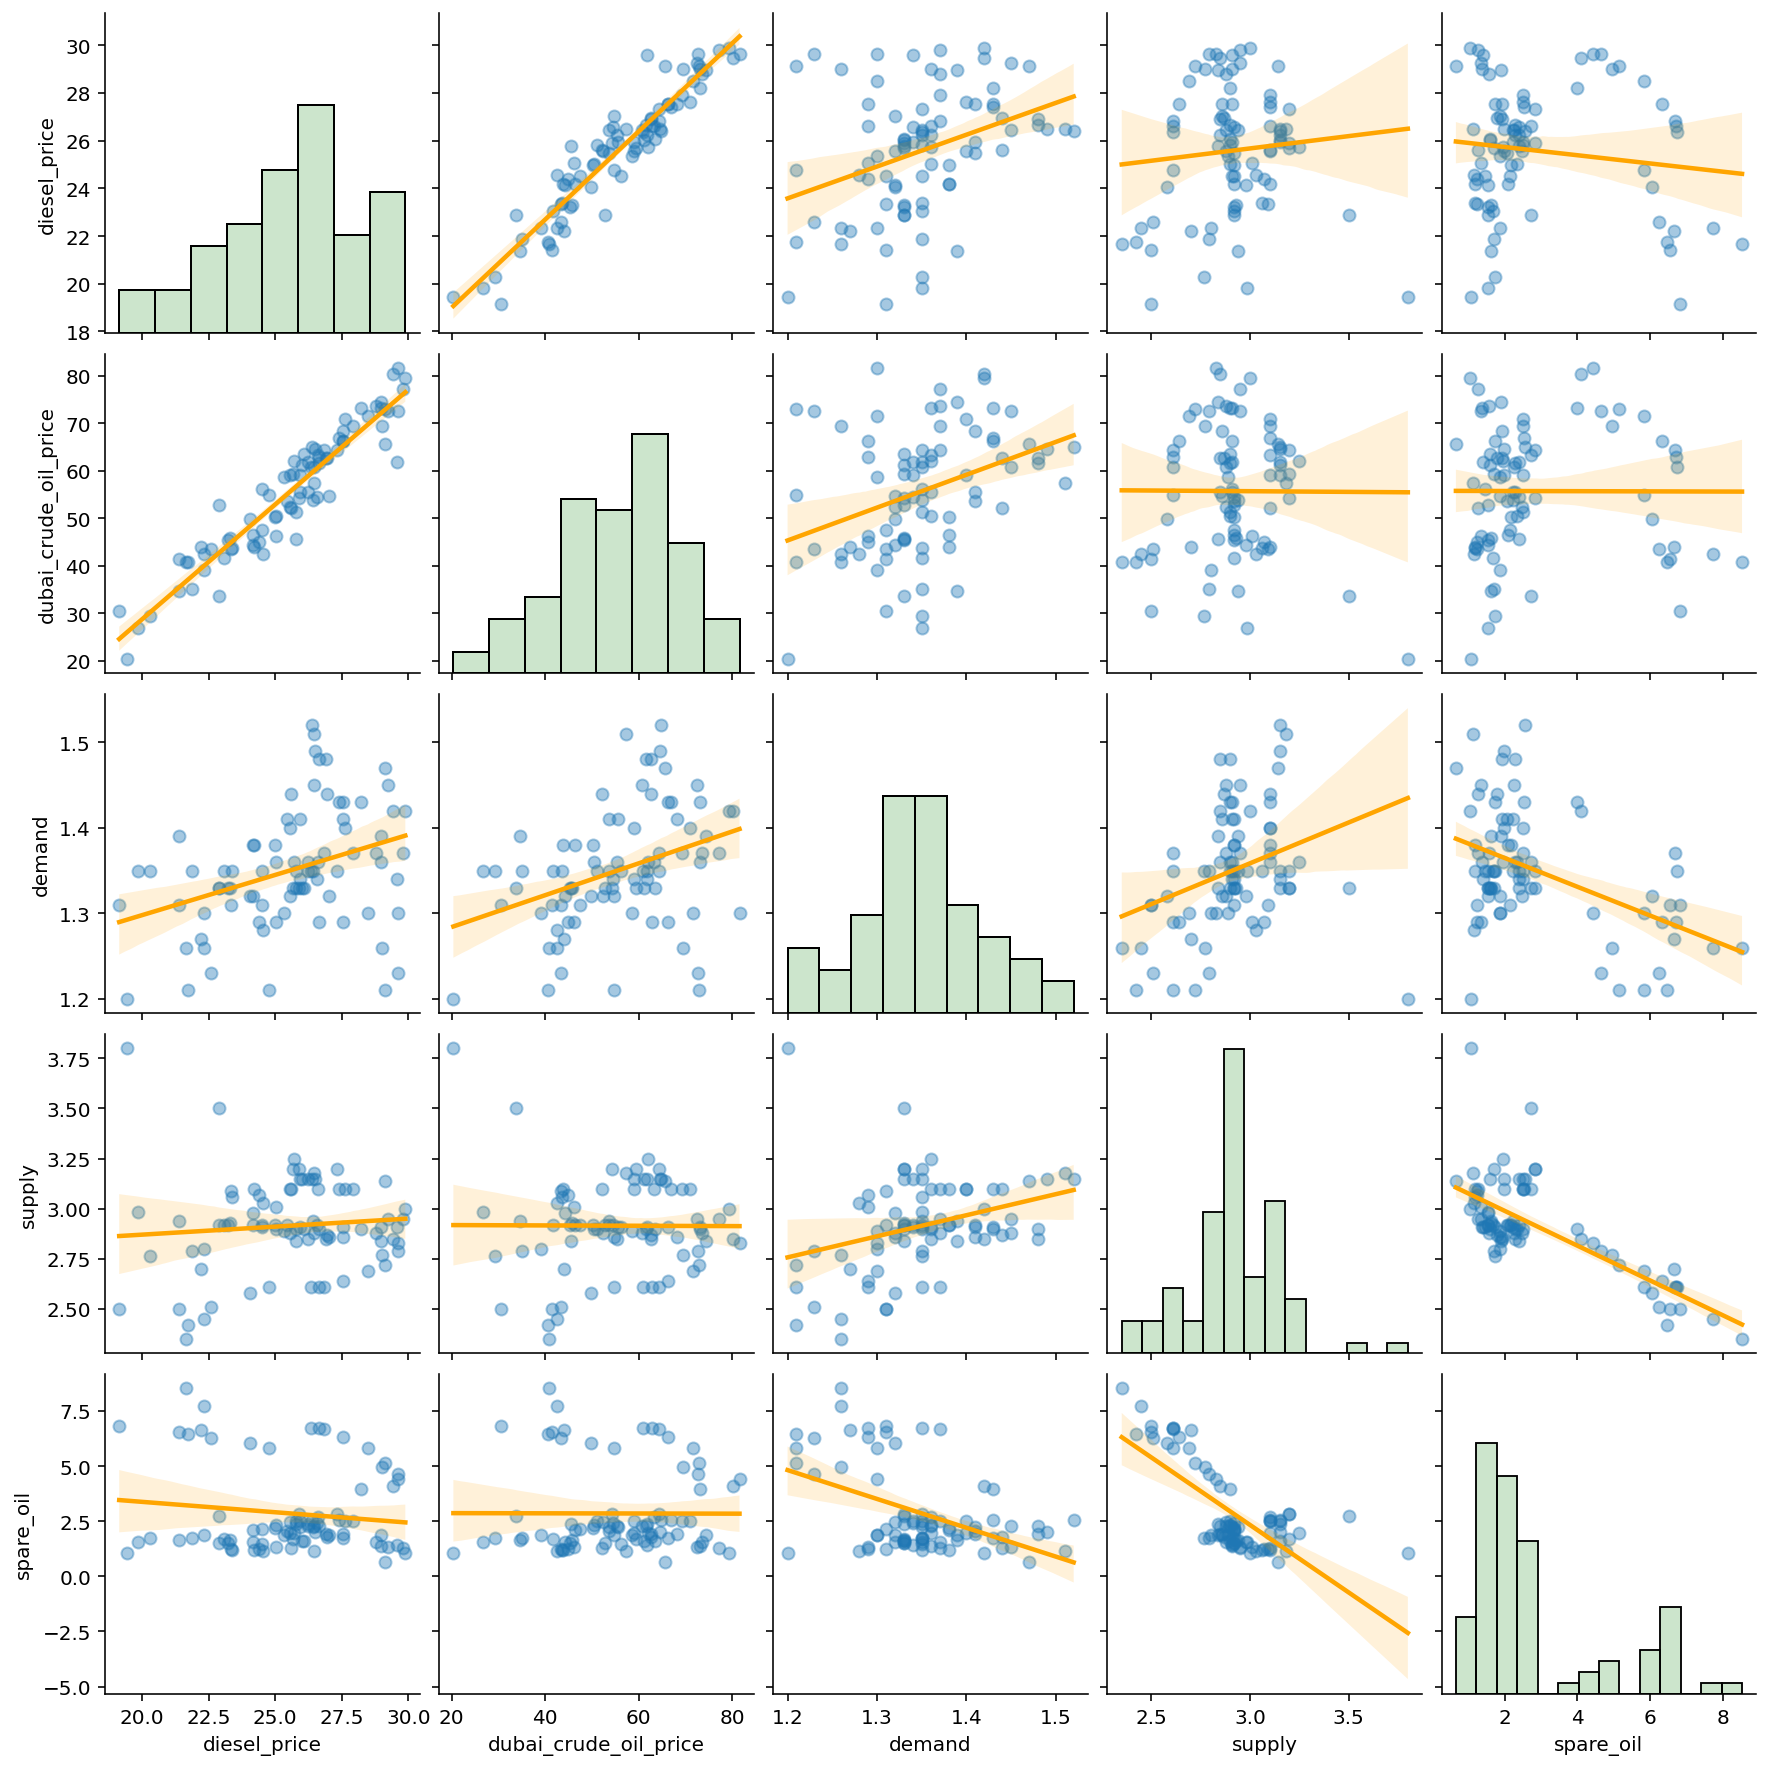

In [9]:
sns.pairplot(df1,
             kind='reg',
             plot_kws={'scatter_kws': {'alpha': 0.4},
                       'line_kws': {'color': 'orange'}},
             diag_kws={'color': 'green', 'alpha': .2})


จากข้อมูลที่แสดงบน pairplot จะเห็นได้ชัดเจนว่าราคาน้ำมันดิบ(crude oil price) มีความสัมพันธ์กับราคาน้ำมันดีเซล(diesel price) อย่างมีนัยสำคัญ หมายความว่าราคาน้ำมันดิบ(crude oil price) เป็นตัวแปรที่สามารถนำมาใช้คาดการณ์ในโมเดลนี้ได้

## สร้างโมเดล (LinearRegression)

นำข้อมูล ราคาน้ำมันดิบ (crude oil price) อุปสงค์ของน้ำมัน (oil demand) อุปทานของน้ำมัน (oil supply) และ การกักตุนน้ำมัน (spare oil) สร้างโมเดลเพื่อคาดการณ์ราคาน้ำมันดีเซล (diesel price)

In [10]:
model = LinearRegression()
model


LinearRegression()

In [11]:
df1 = df1.reset_index()
X, y = df1[['demand', 'supply', 'dubai_crude_oil_price',
           'spare_oil']], df1.diesel_price
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=100)
X_train[:5]


,demand,supply,dubai_crude_oil_price,spare_oil
40,1.39,2.84,74.41,1.890000
57,1.33,3.20,59.37,1.710000
21,1.29,3.07,44.92,1.239673
69,1.21,2.42,40.66,6.450000
46,1.47,3.14,65.56,0.660000


In [12]:
model.fit(X_train, y_train)


LinearRegression()

In [13]:
y_hat = model.predict(X_test)
y_hat


array([21.72423605, 28.42309941, 25.4103071 , 26.93216341, 28.02609932,
       25.069763  , 23.70890165, 23.63829019, 25.00789187, 30.18951687,
       23.82621421, 28.63335594, 22.78115155, 24.75605251, 28.99859487,
       23.87782069, 25.85144497, 26.39176839, 20.11694269, 20.411322  ,
       25.14908555, 26.77409288, 27.5944638 , 24.63477752, 29.78091752,
       25.4650361 ])

In [14]:
dd1 = pd.concat([X_test.reset_index(), y_test.reset_index(),
                 pd.Series(y_hat, name='predicted')], axis='columns')
dd1.drop('index', axis=1, inplace=True)
dd1[:5]


,demand,supply,dubai_crude_oil_price,spare_oil,diesel_price,predicted
0,1.39,2.94,34.59,1.629802,21.37,21.724236
1,1.40,3.10,70.95,2.500000,27.61,28.423099
2,1.34,2.92,54.44,2.400000,26.57,25.410307
3,1.34,2.91,61.79,1.400246,29.57,26.932163
4,1.30,2.69,71.57,5.825000,28.50,28.026099


In [15]:
print('train score =', model.score(X_train, y_train))
print('test score =', model.score(X_test, y_test))



train score = 0.9014750429100981
test score = 0.9223379745658519


การ score ของ train data มีความแม่นยำประมาณร้อยละ 90 ซึ่งเป็นค่าที่ค่อนข้างสูงมากและจาก test data มีความแม่นยำประมาณร้อยละ 92 ทำให้เห็นว่า model นั้นสามารถนำไปใช้คาดการณ์ข้อมูลที่อยู่นอกเหนือจาก train data ได้อย่างค่อนข้างแม่นยำ

## เช็คค่านัยสำคัญทางสถิติ (statmodel)

เช็คค่านัยสำคัญทางสถิติเพื่อดูความสัมพันธ์ของตัวแปรแต่ละตัวที่ส่งผลต่อ model

In [16]:
train, test = train_test_split(df1, train_size=0.3, random_state=100)
model1 = smf.ols(
    formula='diesel_price ~ demand + supply + dubai_crude_oil_price + spare_oil', data=train).fit()
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:           diesel_price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     66.57
Date:                Wed, 11 May 2022   Prob (F-statistic):           2.85e-11
Time:                        01:21:08   Log-Likelihood:                -23.454
No. Observations:                  25   AIC:                             56.91
Df Residuals:                      20   BIC:                             63.00
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                28.35

จากค่านัยสำคัญทางสถิติ(statmodel) จะเห็นว่า p-value ของราคาน้ำมันดิบ(crude oil price) และ การกักตุนน้ำมัน(spare oil) นั้นมีค่าน้อยมาก ซึ่งแปลว่าตัวแปรทั้งสองนั้นเป็นตัวแปรที่มีผลต่อโมเดลเป็นอย่างมาก

## <div style = "background-color:#6b705c;padding:10px;"><span style="color:lavender"><b>คาดการณ์ราคาน้ำมันสำเร็จรูปในระยะยาว (รายปี)</b></span></div>

เพื่อศึกษาความสัมพันธ์และคาดการณ์ราคาน้ำมันสำเร็จรูปในระยะยาวทางเรามีสมมุติฐานที่ว่าตัวแปรภาพรวมทางเศรษฐกิจทั้ง3 ปัจจัย คือ อัตราแลกเปลี่ยน(usd-thb) อัตราเงินเฟ้อ(inflation) และค่าอุปสงค์ในประเทศ(domestic demand)นั้นส่งผลต่อราคาน้ำมัน(cruid oil price)ในระยะยาว(รายปี)

In [17]:
p_price_y = pd.read_csv(
    'https://github.com/pitcha555/ML_hellohack/raw/main/oil_price_y_year.csv')
p_price_y[:5]

,year,diesel_price
0,1991,8.03
1,1992,7.83
2,1993,7.84
3,1994,7.39
4,1995,7.57


In [18]:
usd_thb = pd.read_csv(
    'https://github.com/pitcha555/ML_hellohack/raw/main/USD_THB.csv')
usd_thb[:5]

,year,usd_thb
0,1991,25.270
1,1992,25.525
2,1993,25.515
3,1994,25.105
4,1995,25.190


In [19]:
inflation = pd.read_csv(
    'https://github.com/pitcha555/ML_hellohack/raw/main/inflation.csv')
inflation[:5]

,year,inflation
0,1991,47.7
1,1992,49.6
2,1993,50.0
3,1994,52.5
4,1995,55.5


In [20]:
dmt_demand = pd.read_csv(
    'https://github.com/pitcha555/ML_hellohack/raw/main/domestic_y.csv')
dmt_demand['domestic_y'] = dmt_demand['domestic_y']/10000000
dmt_demand = dmt_demand.round(2)
dmt_demand[:5]

,year,domestic_y
0,1991,0.28
1,1992,0.31
2,1993,0.34
3,1994,0.39
4,1995,0.45


## เปรียบเทียบความสัมพันธ์ของตัวแปร (pairplot)
* ราคาน้ำมันดีเซล (diesel price)
* ค่าเงิน usd เทียบเงินบาท (usd-thb)
* ค่าเงินเฟ้อ (inflation)
* อุปสงค์ภายในประเทศ (domestic demand)

In [21]:
df2 = pd.concat([p_price_y, usd_thb.drop('year', axis=1), inflation.drop(
    'year', axis=1), dmt_demand.drop('year', axis=1)], axis=1)
df2[:5]

,year,diesel_price,usd_thb,inflation,domestic_y
0,1991,8.03,25.270,47.7,0.28
1,1992,7.83,25.525,49.6,0.31
2,1993,7.84,25.515,50.0,0.34
3,1994,7.39,25.105,52.5,0.39
4,1995,7.57,25.190,55.5,0.45


เนื่องจากค่าของตัวแปรแต่ละตัวมีสัดส่วนต่างกันมากเกินไปจึงต้องทำการแปลงเป็น z score เพื่อให้สามารถนำข้อมูลไปใช้ใน model ได้อย่างมีประสิทธิภาพ

In [22]:
cols = ['usd_thb', 'inflation', 'domestic_y']
scaler = preprocessing.StandardScaler()
z = scaler.fit_transform(df2[cols])
z[:5].round(2)

array([[-1.41, -1.77, -1.37],
       [-1.36, -1.66, -1.29],
       [-1.36, -1.64, -1.22],
       [-1.43, -1.49, -1.1 ],
       [-1.42, -1.32, -0.96]])

In [23]:
z_cols = [f'z_{c}' for c in cols]
df2 = pd.concat([df2, pd.DataFrame(z, columns=z_cols)], axis='columns')
df2[:5]

,year,diesel_price,usd_thb,inflation,domestic_y,z_usd_thb,z_inflation,z_domestic_y
0,1991,8.03,25.270,47.7,0.28,-1.405422,-1.768143,-1.365268
1,1992,7.83,25.525,49.6,0.31,-1.362894,-1.659336,-1.293533
2,1993,7.84,25.515,50.0,0.34,-1.364561,-1.636429,-1.221799
3,1994,7.39,25.105,52.5,0.39,-1.432940,-1.493262,-1.102242
4,1995,7.57,25.190,55.5,0.45,-1.418764,-1.321461,-0.958773


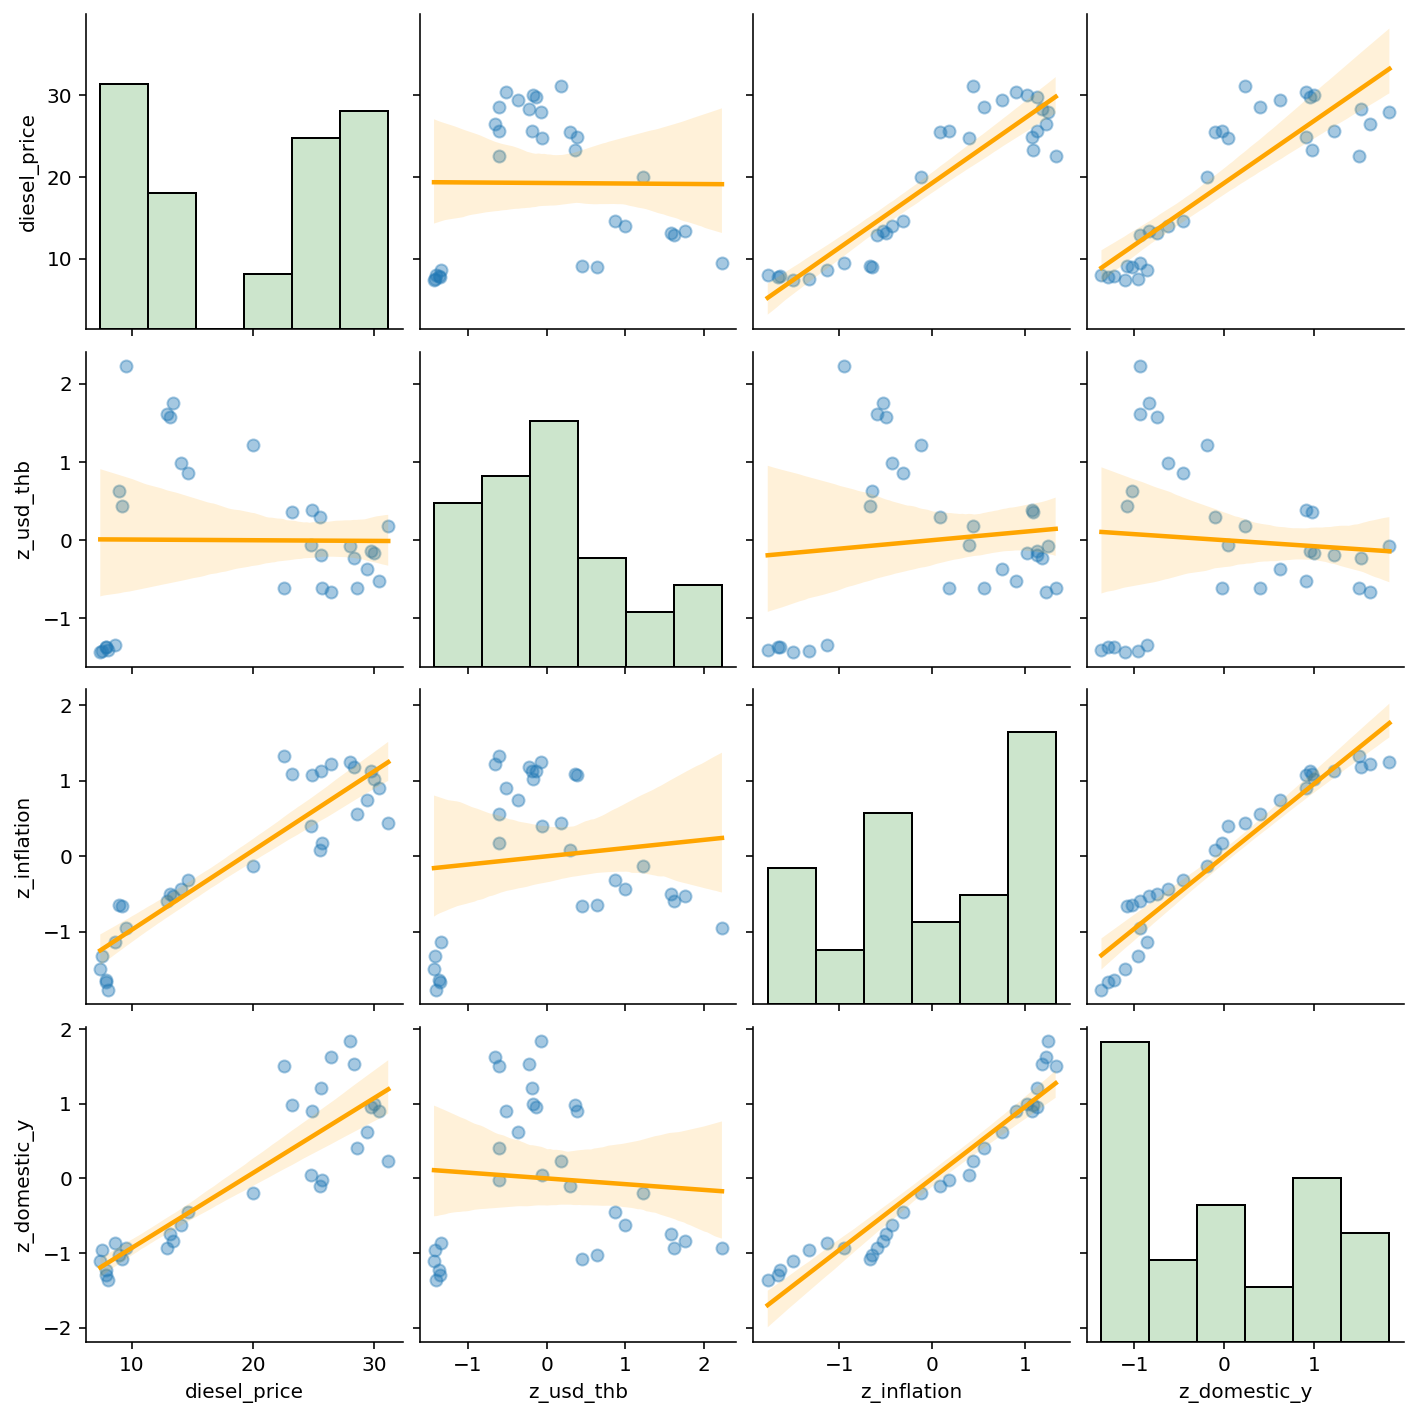

In [24]:
sns.pairplot(df2[['diesel_price', 'z_usd_thb', 'z_inflation', 'z_domestic_y']],
            kind='reg',
            plot_kws={'scatter_kws': {'alpha': 0.4},
                'line_kws': {'color': 'orange'}},
            diag_kws={'color': 'green', 'alpha': .2})

จากข้อมูลที่แสดงบน pairplot จะเห็นได้ว่า ค่าเงินเฟ้อ และค่าอุปสงค์ภายในประเทศ มีความสัมพันธ์ที่มีการแปรผันตามซึ่งกันและกัน กล่าวคือ หากเงินเฟ้อสูงขึ้น อุปสงค์ภายในประเทศก็จะเพิ่มขึ้นเช่นกัน 
หลักการของภาวะเงินเฟ้อสอดคล้องกับกราฟ pairplot โดย ภาวะเงินเฟ้อจะช่วยสร้างแรงจูงใจให้ทุกคนเกิดการใช้จ่ายและลงทุนกระตุ้นเศรษฐกิจ แตะอัตราเงินเฟ้อก็ควรอยู่ในระดับต่ำหรือคงที่เท่านั้น 

## สร้างโมเดล (LinearRegression)

นำข้อมูล ค่าเงิน usd เทียบเงินบาท (usd-thb), ค่าเงินเฟ้อ (inflation), อุปสงค์ภายในประเทศ (domestic demand) มาสร้างโมเดลเพื่อคาดการณ์ราคาน้ำมันดีเซล (diesel price)

In [25]:
model = LinearRegression()
model

LinearRegression()

In [26]:
df2 = df2.reset_index()
X, y = df2[['z_usd_thb', 'z_inflation', 'z_domestic_y']], df2.diesel_price
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=12)
df2[:5]

,index,year,diesel_price,usd_thb,inflation,domestic_y,z_usd_thb,z_inflation,z_domestic_y
0,0,1991,8.03,25.270,47.7,0.28,-1.405422,-1.768143,-1.365268
1,1,1992,7.83,25.525,49.6,0.31,-1.362894,-1.659336,-1.293533
2,2,1993,7.84,25.515,50.0,0.34,-1.364561,-1.636429,-1.221799
3,3,1994,7.39,25.105,52.5,0.39,-1.432940,-1.493262,-1.102242
4,4,1995,7.57,25.190,55.5,0.45,-1.418764,-1.321461,-0.958773


In [27]:
model.fit(X_train, y_train)

LinearRegression()

In [28]:
y_hat = model.predict(X_test)
y_hat

array([15.58796468, 29.26609186, 24.45415238, 16.10529478,  7.1640513 ,
       27.6503481 ,  9.91144761, 20.29412432, 27.76704648, 13.29082991])

In [29]:
dd2 = pd.concat([X_test.reset_index(), y_test.reset_index(),
                pd.Series(y_hat, name='predicted')], axis='columns')
dd2.drop('index', axis=1, inplace=True)
dd2[:5]

,z_usd_thb,z_inflation,z_domestic_y,diesel_price,predicted
0,0.442471,-0.662892,-1.078330,9.15,15.587965
1,-0.132911,1.129562,0.954145,29.73,29.266092
2,-0.056193,0.396545,0.045509,24.77,24.454152
3,1.222155,-0.124583,-0.193606,20.01,16.105295
4,-1.362894,-1.659336,-1.293533,7.83,7.164051


In [30]:
print('train score =', model.score(X_train, y_train))
print('test score =', model.score(X_test, y_test))

train score = 0.8520647092722444
test score = 0.8579211126162806


จากการคาดการณ์ (predicted) จะเห็นได้ว่า model คาดการณ์ไว้ใกล้เคียงกับค่าความเป็นจริงของข้อมูล รวมถึงค่า score ทั้ง train และ test นั้นมีค่าที่สูงกว่า 85 เปอเซนต์ นั่นทำให้เห็นว่า model สามารถพยากรณ์ได้ค่อนข้างดี

## เช็คค่านัยสำคัญทางสถิติ (statmodel)

เช็คค่านัยสำคัญทางสถิติเพื่อดูความสัมพันธ์ของตัวแปรแต่ละตัวที่ส่งผลต่อ model

In [31]:
train, test = train_test_split(df2, train_size=0.3, random_state=100)
model2 = smf.ols(
    formula='diesel_price ~ z_usd_thb + z_inflation + z_domestic_y', data=train).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:           diesel_price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     11.37
Date:                Wed, 11 May 2022   Prob (F-statistic):             0.0113
Time:                        01:21:17   Log-Likelihood:                -23.160
No. Observations:                   9   AIC:                             54.32
Df Residuals:                       5   BIC:                             55.11
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       20.2067      2.176      9.288   

c:\Users\User\miniconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


เมื่อลองใช้ statmodel แล้ว จะเห็นว่า ค่า p-values ของตัวแปรอิสระทั้ง 3 ตัวแปรนั้นมีค่าที่สูงเกิน หมายความว่า ค่าสังเกตมีไม่เพียงพอที่จะสรุปได้ว่าตัวแปรค่าเงิน usd เทียบเงินบาท (usd-thb), ค่าเงินเฟ้อ (inflation), อุปสงค์ภายในประเทศ (domestic demand) มีความสัมพันธ์กันอย่างมีนัยสำคัญทางสถิติ ซึ่งผลลัพท์ของ p-values ไม่สอดคล้องกับ score model ที่เราได้คำนวนมาก่อนหน้านี้ อาจเป็นไปได้ว่าข้อมูลที่นำมาทำ model นั้นมีไม่เพียงพอต่อการคาดการณ์ (มีข้อมูลน้อยเกินไป) สรุปได้ว่า จำนวนข้อมูลของ ค่าเงิน usd เทียบเงินบาท , ค่าเงินเฟ้อ , อุปสงค์ภายในประเทศ มีไม่เพียงพอที่จะระบุว่าสัมพันธ์กัน

## <div style = "background-color:#6b705c;padding:10px;"><span style="color:lavender"><b>คาดการณ์ราคาน้ำมันสำเร็จรูป 5 ปีข้างหน้า โดยใช้ Facebook Prophet</b></span></div>
นำข้อมูลรายปีของราคาน้ำมันดีเซลตั้งแต่ปี 1991-2021 มาใช้ทำการคาดการณ์ราคาน้ำมันสำเร็จรูปในอนาคต

In [32]:
p_price_ey = pd.read_csv(
    'https://github.com/pitcha555/ML_hellohack/raw/main/oil_price_y_endyear.csv', parse_dates=['year'])
p_price_ey[:5]

,year,diesel_price
0,1991-12-31,8.03
1,1992-12-31,7.83
2,1993-12-31,7.84
3,1994-12-31,7.39
4,1995-12-31,7.57


In [33]:
y_col = 'diesel_price'
df_diesel = p_price_ey[['year', y_col]]
df_diesel.columns=['ds', 'y']
df_diesel[:5]

,ds,y
0,1991-12-31,8.03
1,1992-12-31,7.83
2,1993-12-31,7.84
3,1994-12-31,7.39
4,1995-12-31,7.57


<AxesSubplot:xlabel='ds'>

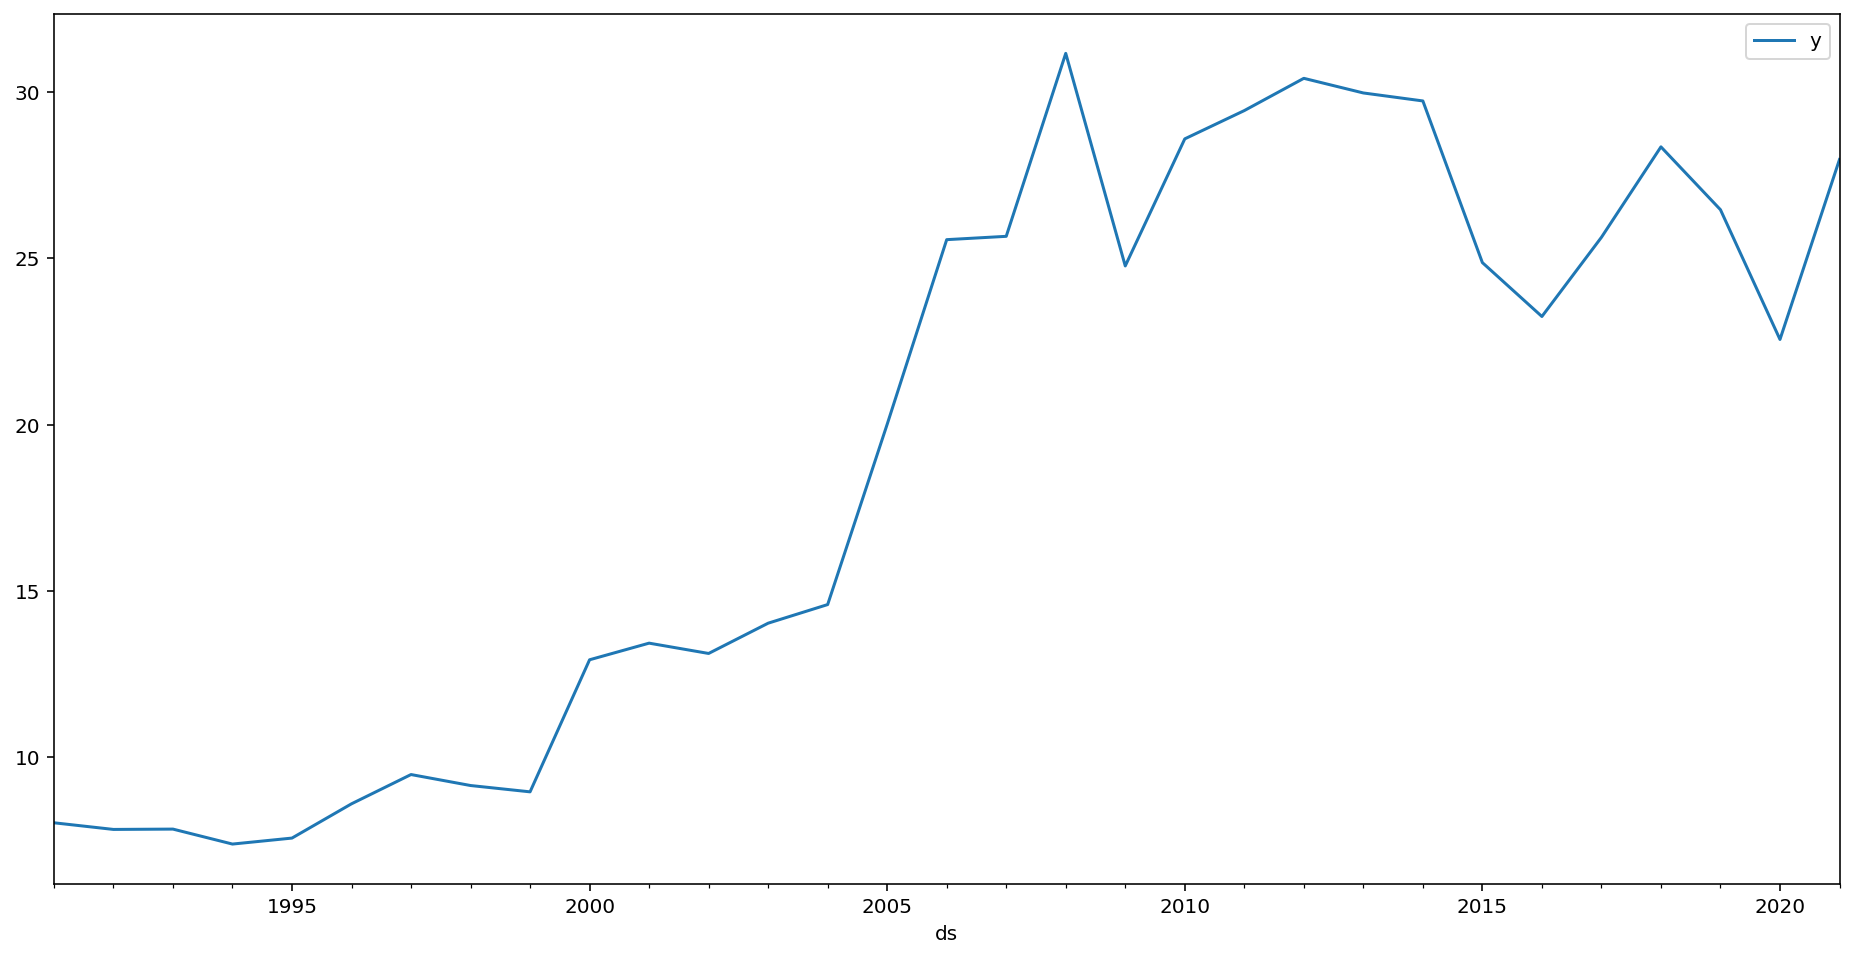

In [34]:
df_diesel.set_index('ds').plot(figsize=(16, 8))

เมื่อนำข้อมูลรายปีทั้งหมดมาแสดงเป็นกราฟเพื่อดูแนวโน้มของราคาน้ำมันสำเร็จรูป โดยในช่วงแรกก่อนที่จะมีการเก็บรวบรวมข้อมูลราคาน้ำมันดีเซลในไทยขยับขึ้นจาก 6.10 บาทเป็น
8.40 บาทต่อลิตร เท่ากับขึ้นมา 38% จากเหตุการณ์สงครามอ่าวเปอร์เซียที่ตามมาด้วยปัญหาในการนำเข้าน้ำมันหลังจากนั้นราคาน้ำมันดีเซลยังคงราคาไม่ขยับสูงขึ้นไปกว่า 10 บาทต่อลิตรจนกระทั่งในช่วงปี 2000 ราคาได้ปรับตัวสูงกว่า 10 บาทต่อลิตรจากเหตุการณ์ปรับตัวสูงขึ้นของต้นทุนราคาน้ำมันดิบที่อ้างอิงจากราคาน้ำมันสำเร็จรูปในตลาดจรสิงคโปร์ นอกจากนั้นยังมีเหตุการณ์จากเศรษฐกิจในประเทศทำให้ต้นทุนราคาน้ำมันที่สูงขึ้นจากฐานภาวะเศรษฐกิจที่เปลี่ยนไป ผลจากค่าเงินบาทที่ อ่อนตัวลงหลังการลอยตัวค่าเงินบาท และการขึ้นภาษีสรรพสามิตน้ำมันเมื่อต้นปี 2541 การอ่อนตัวของค่าเงินบาท หากเปรียบเทียบค่าเงินบาทในปลายปี 2543 กับก่อนการลอยตัวค่าเงินบาทกลางปี 2540 ค่าเงินบาทได้อ่อนตัวจากระดับ 25.50 บาท/เหรียญสหรัฐ มาอยู่ในระดับ 39 บาท/เหรียญสหรัฐ ทำให้ต้นทุนน้ำมันดีเซลสูงขึ้น ในระดับ 2.3 บาท/ลิตร และกลางปี 2543 ค่าเงินบาทได้อ่อนตัวลงมาอยู่ในระดับ 40 - 41 บาท/เหรียญสหรัฐ ต้นทุนน้ำมันดีเซลจึงสูงขึ้นมาอีก 0.30-0.40 บาท/ลิตร ต่อมาในช่วงปี 2008 ที่ราคาน้ำมันสำเร็จรูปสูงขึ้นเป็นประวัติการณ์จากเหตุการณ์ Subprime และความขัดแย้งในอิหร่านซึ่งเป็นผู้ผลิตรายใหญ่ของ Opec โดยราคาปรับตัวจากราวๆ 25 บาท/ลิตร เป็น 31 บาท/ลิตร

## สร้างโมเดล(Phophet)

In [35]:
model = Prophet()

In [36]:
model.fit(df_diesel)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


In [37]:
future = model.make_future_dataframe(periods=5, freq='Y')
future.tail()

,ds
31,2022-12-31
32,2023-12-31
33,2024-12-31
34,2025-12-31
35,2026-12-31


In [38]:
forecast = model.predict(future)

In [39]:
forecast[:5]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1991-12-31,-4.107965,1.276142,11.866452,-4.107965,-4.107965,10.749528,10.749528,10.749528,10.749528,10.749528,10.749528,0.0,0.0,0.0,6.641563
1,1992-12-31,-3.254179,1.858614,12.563142,-3.254179,-3.254179,10.353647,10.353647,10.353647,10.353647,10.353647,10.353647,0.0,0.0,0.0,7.099467
2,1993-12-31,-2.402726,2.966772,13.570379,-2.402726,-2.402726,10.581460,10.581460,10.581460,10.581460,10.581460,10.581460,0.0,0.0,0.0,8.178734
3,1994-12-31,-1.551273,3.389477,14.417621,-1.551273,-1.551273,10.713479,10.713479,10.713479,10.713479,10.713479,10.713479,0.0,0.0,0.0,9.162205
4,1995-12-31,-0.699820,4.659829,15.537946,-0.699820,-0.699820,10.749528,10.749528,10.749528,10.749528,10.749528,10.749528,0.0,0.0,0.0,10.049708


In [40]:
dfcst_diesel = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
dfcst_diesel[:5]

,ds,yhat,yhat_lower,yhat_upper
0,1991-12-31,6.641563,1.276142,11.866452
1,1992-12-31,7.099467,1.858614,12.563142
2,1993-12-31,8.178734,2.966772,13.570379
3,1994-12-31,9.162205,3.389477,14.417621
4,1995-12-31,10.049708,4.659829,15.537946


## เปรียบเทียบค่าที่ได้
เปรียบเทียบค่า y (ราคาน้ำมันสำเร็จรูปจริง) กับ yhat (ราคาน้ำมันสำเร็จรูปจริงที่คาดการณ์ได้)

In [41]:
diesel_prophet = pd.merge(df_diesel, dfcst_diesel, left_on='ds', right_on='ds')
diesel_prophet['ds'] = diesel_prophet['ds'].dt.year
diesel_prophet.rename(columns={'ds':'year'}, inplace=True)
diesel_prophet[:5]

,year,y,yhat,yhat_lower,yhat_upper
0,1991,8.03,6.641563,1.276142,11.866452
1,1992,7.83,7.099467,1.858614,12.563142
2,1993,7.84,8.178734,2.966772,13.570379
3,1994,7.39,9.162205,3.389477,14.417621
4,1995,7.57,10.049708,4.659829,15.537946


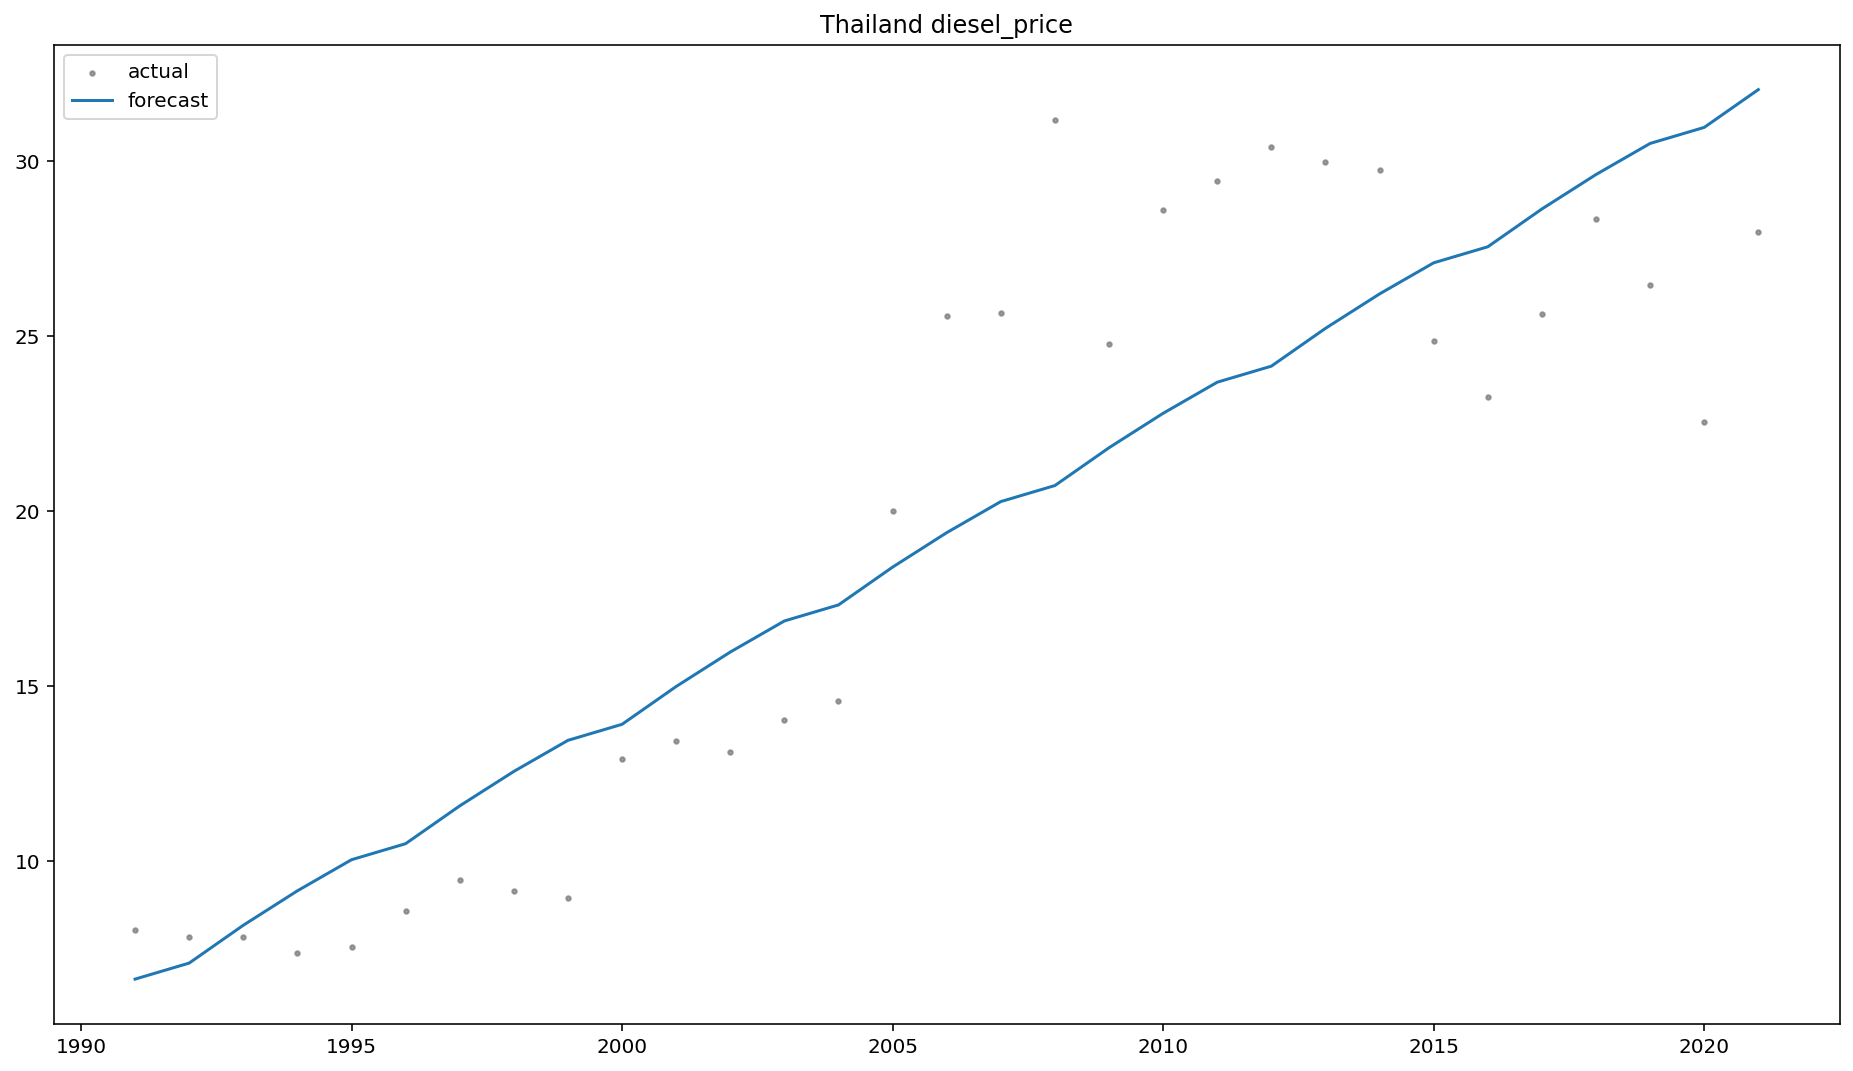

In [42]:
plt.figure(figsize=(16,9))
plt.scatter(diesel_prophet['year'], diesel_prophet['y'], color='.4', label='actual', s=5, alpha=.6)
plt.plot(diesel_prophet['year'], diesel_prophet['yhat'], label='forecast')
plt.title(f'Thailand {y_col}')
plt.legend()

แสดงผลกราฟเปรียบเทียบราคาน้ำมันจริงและจากการคาดการณ์พบว่าแนวโน้มไปในทิศทางเดียวกัน 

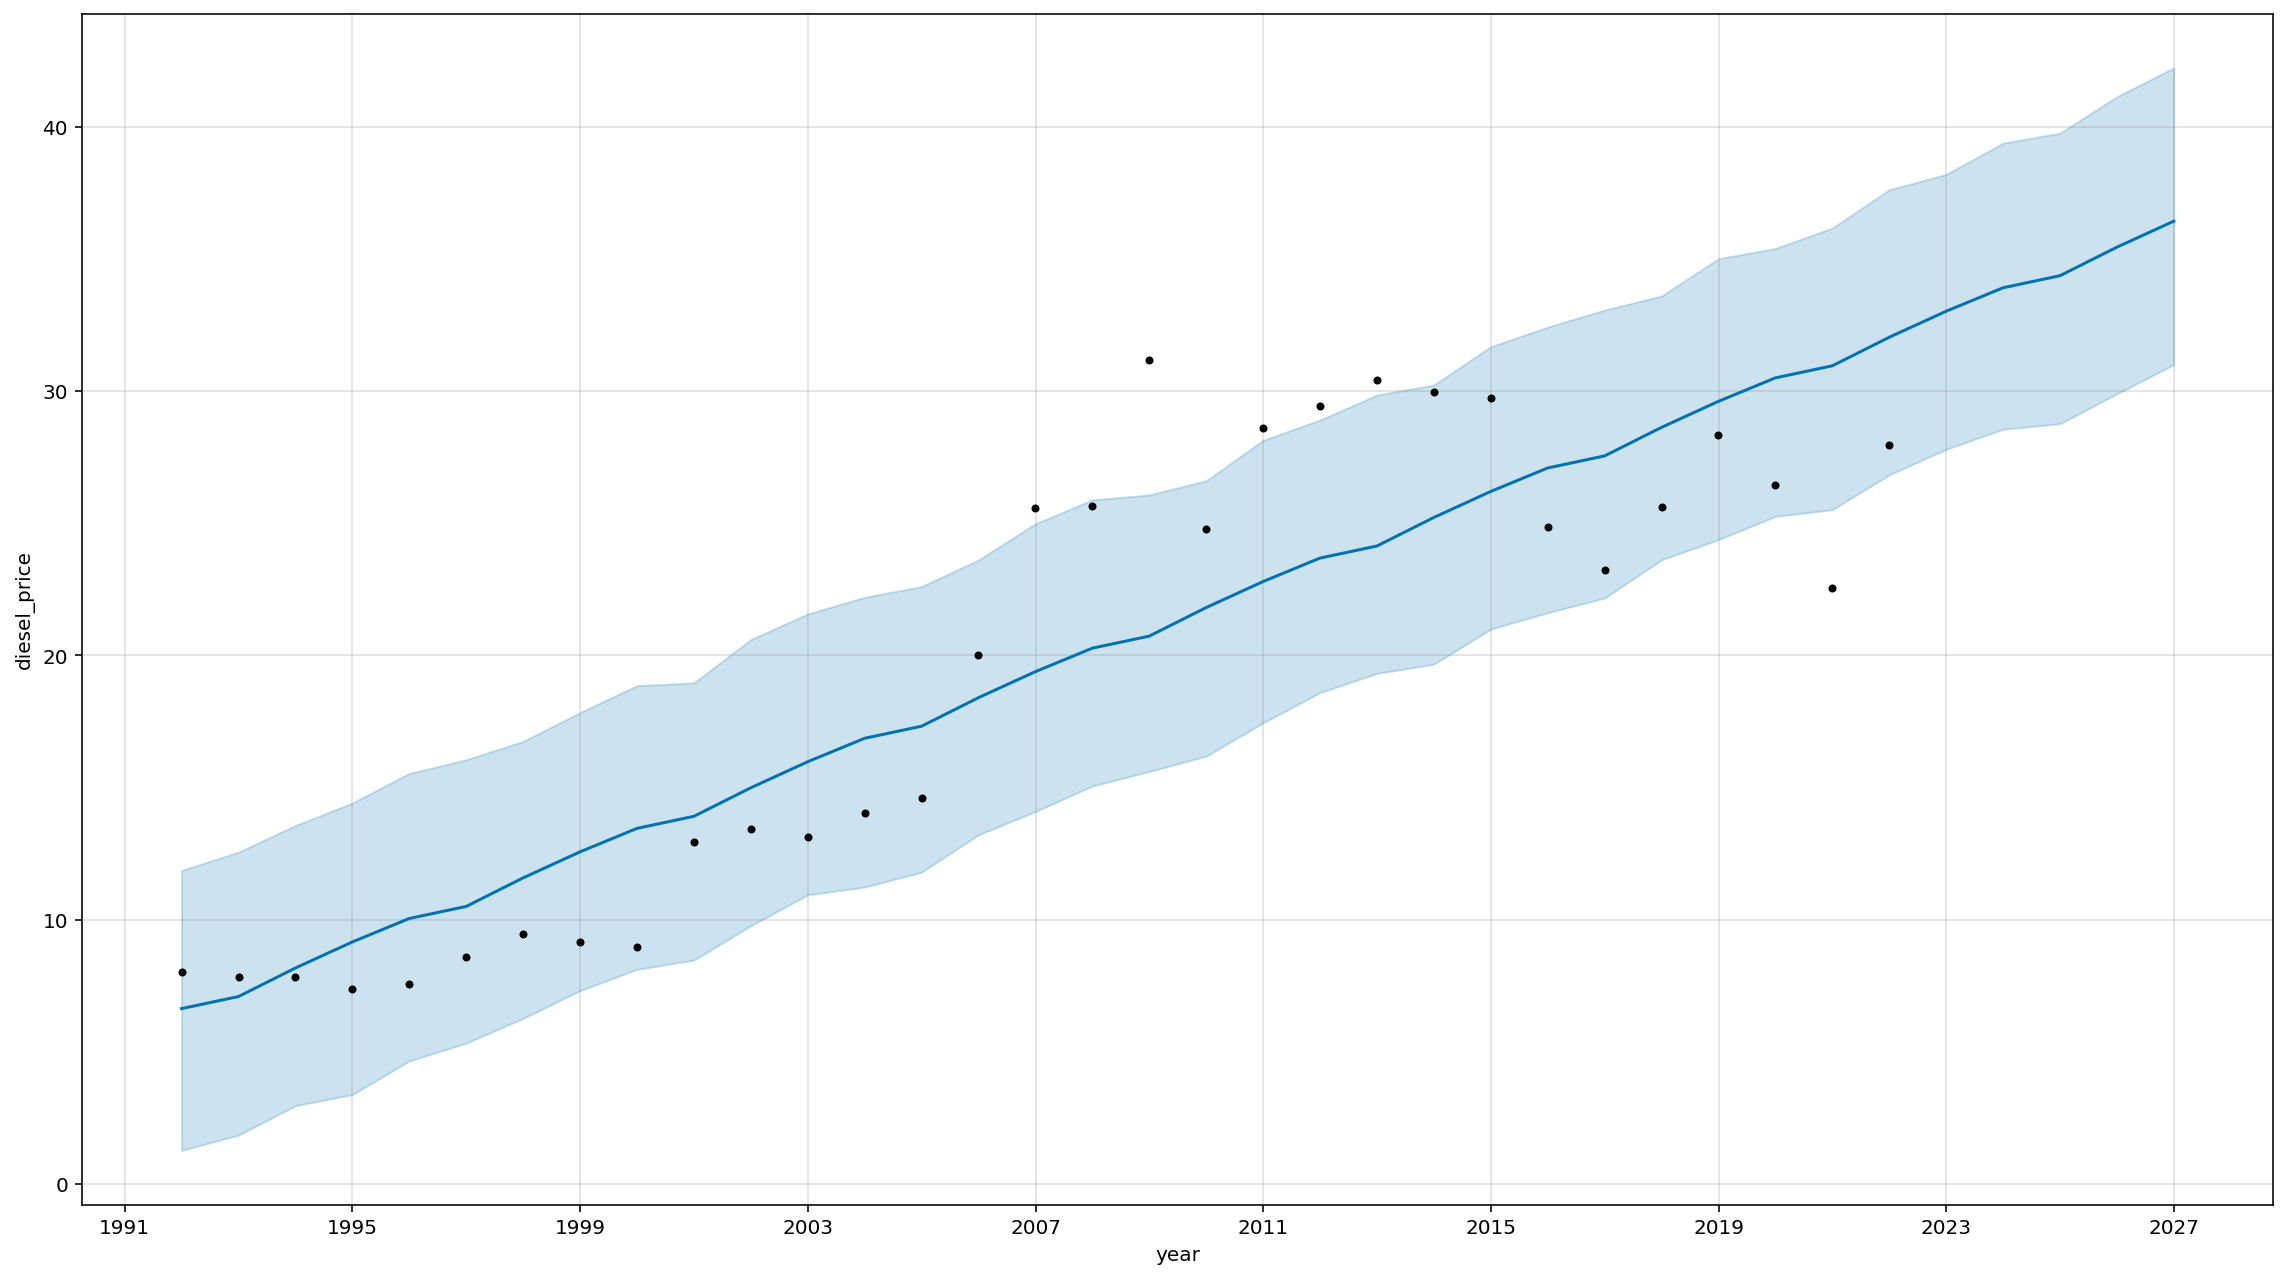

In [43]:
fig = model.plot(forecast, uncertainty=True, figsize=(16, 9), xlabel='year', ylabel=y_col)

เมื่อคาดการณ์ออกมาแล้ว กราฟที่ใช้ phophet ค่อนข้างเกิดความคลาดเคลื่อน จาก trend graph จะเห็นว่าราคาน้ำมันมีทิศทางไปในทางบวก อย่างไรก็ตาม ช่วงปี 2007-2015 มีปัจจัยอื่นที่ส่งผลทำให้ราคาน้ำมันไม่เป็นไปอย่างที่คาดการณ์ไว้ (outliner)

## <div style = "background-color:#6b705c;padding:10px;"><span style="color:lavender"><b>คาดการณ์ค่าเงินเฟ้อ 5 ปีข้างหน้า โดยใช้ Facebook Prophet</b></span></div>

นำข้อมูลรายปีของค่าเงินเฟ้อตั้งแต่ปี 1991-2021 มาใช้ทำการคาดการณ์ค่าเงินเฟ้อในอนาคต

In [44]:
inflation_ey = pd.read_csv(
    'https://github.com/pitcha555/ML_hellohack/raw/main/inflation_endyear.csv', parse_dates=['year'])
inflation_ey[:5]

,year,inflation
0,1991-12-31,47.7
1,1992-12-31,49.6
2,1993-12-31,50.0
3,1994-12-31,52.5
4,1995-12-31,55.5


In [45]:
y2_col = 'inflation'

In [46]:
df_inflation = inflation_ey[['year', y2_col]]
df_inflation.columns=['ds', 'y']
df_inflation[:5]

,ds,y
0,1991-12-31,47.7
1,1992-12-31,49.6
2,1993-12-31,50.0
3,1994-12-31,52.5
4,1995-12-31,55.5


<AxesSubplot:xlabel='ds'>

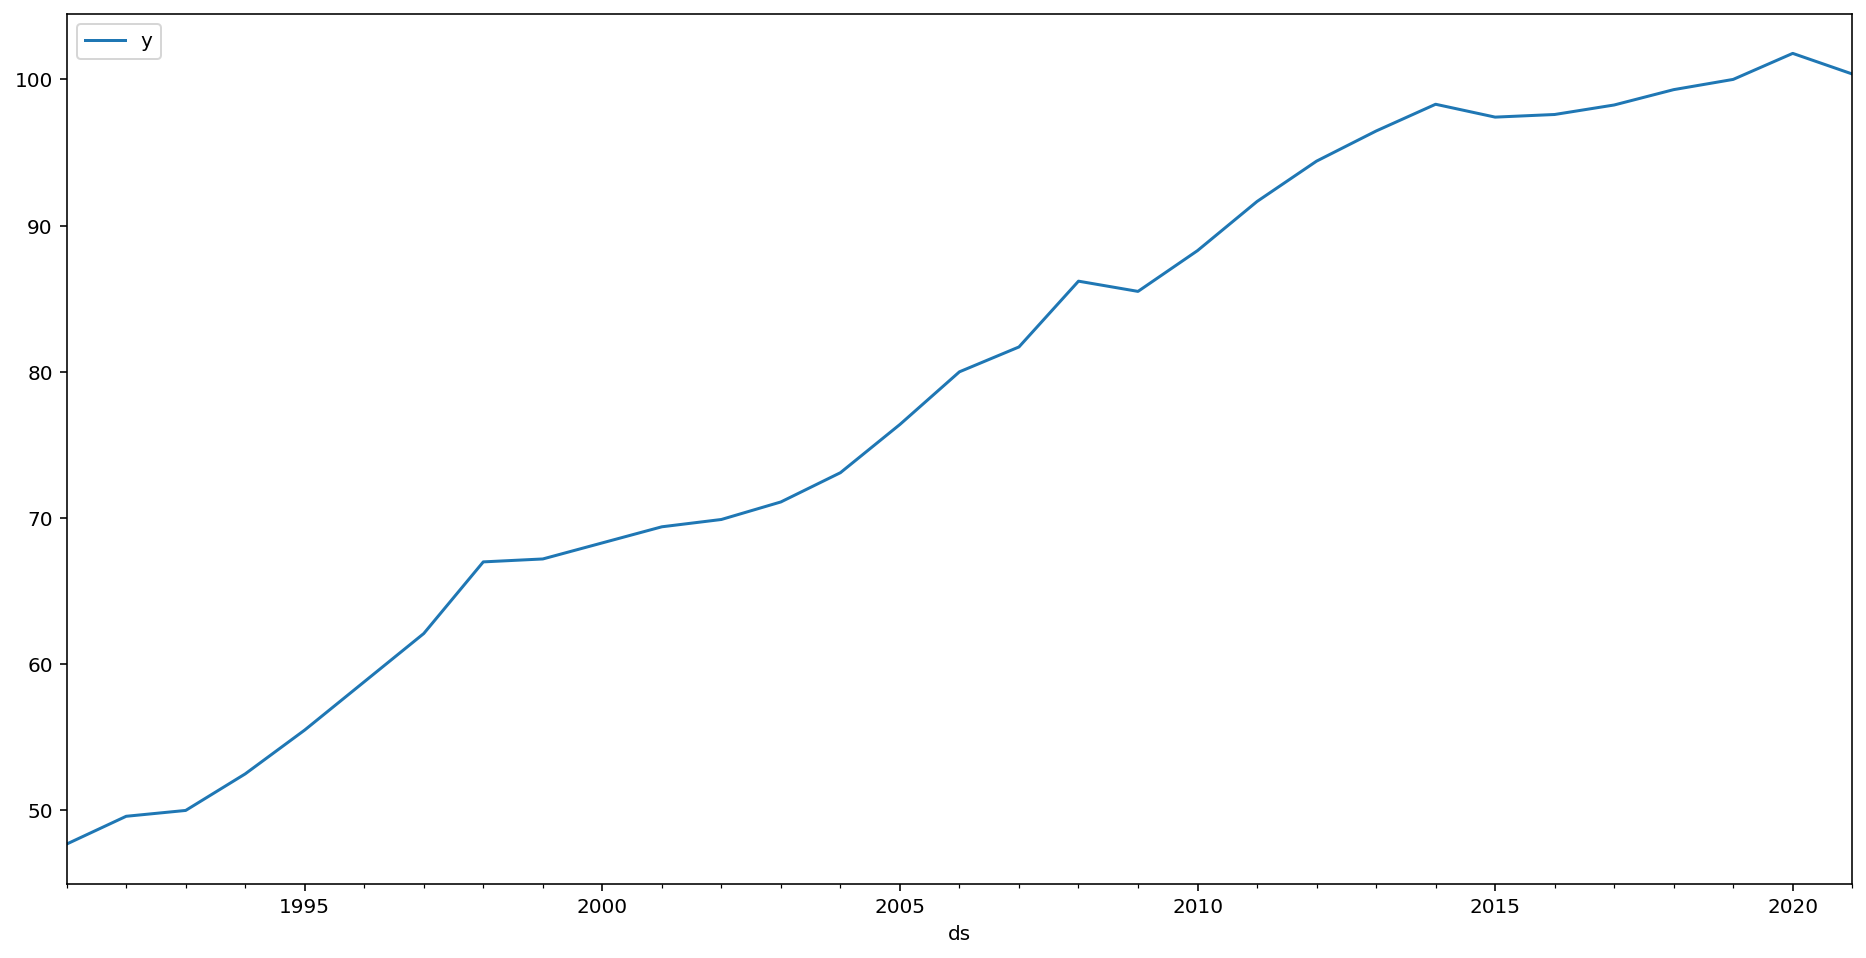

In [47]:
df_inflation.set_index('ds').plot(figsize=(16, 8))

In [48]:
model = Prophet()

In [49]:
model.fit(df_inflation)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


In [50]:
future2 = model.make_future_dataframe(periods=5, freq='Y')
future2.tail()

,ds
31,2022-12-31
32,2023-12-31
33,2024-12-31
34,2025-12-31
35,2026-12-31


In [51]:
forecast2 = model.predict(future2)

In [52]:
forecast2[:5]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1991-12-31,10.849349,45.583276,49.431881,10.849349,10.849349,36.715945,36.715945,36.715945,36.715945,36.715945,36.715945,0.0,0.0,0.0,47.565294
1,1992-12-31,13.030028,47.979227,51.872267,13.030028,13.030028,36.800848,36.800848,36.800848,36.800848,36.800848,36.800848,0.0,0.0,0.0,49.830877
2,1993-12-31,15.204749,49.875077,53.742341,15.204749,15.204749,36.597848,36.597848,36.597848,36.597848,36.597848,36.597848,0.0,0.0,0.0,51.802597
3,1994-12-31,17.379470,52.179364,55.869835,17.379470,17.379470,36.569865,36.569865,36.569865,36.569865,36.569865,36.569865,0.0,0.0,0.0,53.949335
4,1995-12-31,19.554191,54.424985,58.121328,19.554191,19.554191,36.715945,36.715945,36.715945,36.715945,36.715945,36.715945,0.0,0.0,0.0,56.270136


In [53]:
dfcst_inflation = forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
dfcst_inflation[:5]

,ds,yhat,yhat_lower,yhat_upper
0,1991-12-31,47.565294,45.583276,49.431881
1,1992-12-31,49.830877,47.979227,51.872267
2,1993-12-31,51.802597,49.875077,53.742341
3,1994-12-31,53.949335,52.179364,55.869835
4,1995-12-31,56.270136,54.424985,58.121328


## เปรียบเทียบค่าที่ได้

เปรียบเทียบค่า y (ค่าเงินเฟ้อจริง) กับ yhat (ค่าเงินเฟ้อที่คาดการณ์ได้)

In [54]:
inflation_prophet = pd.merge(df_inflation, dfcst_inflation, left_on='ds', right_on='ds')
inflation_prophet['ds'] = inflation_prophet['ds'].dt.year
inflation_prophet.rename(columns={'ds':'year'}, inplace=True)
inflation_prophet[:5]

,year,y,yhat,yhat_lower,yhat_upper
0,1991,47.7,47.565294,45.583276,49.431881
1,1992,49.6,49.830877,47.979227,51.872267
2,1993,50.0,51.802597,49.875077,53.742341
3,1994,52.5,53.949335,52.179364,55.869835
4,1995,55.5,56.270136,54.424985,58.121328


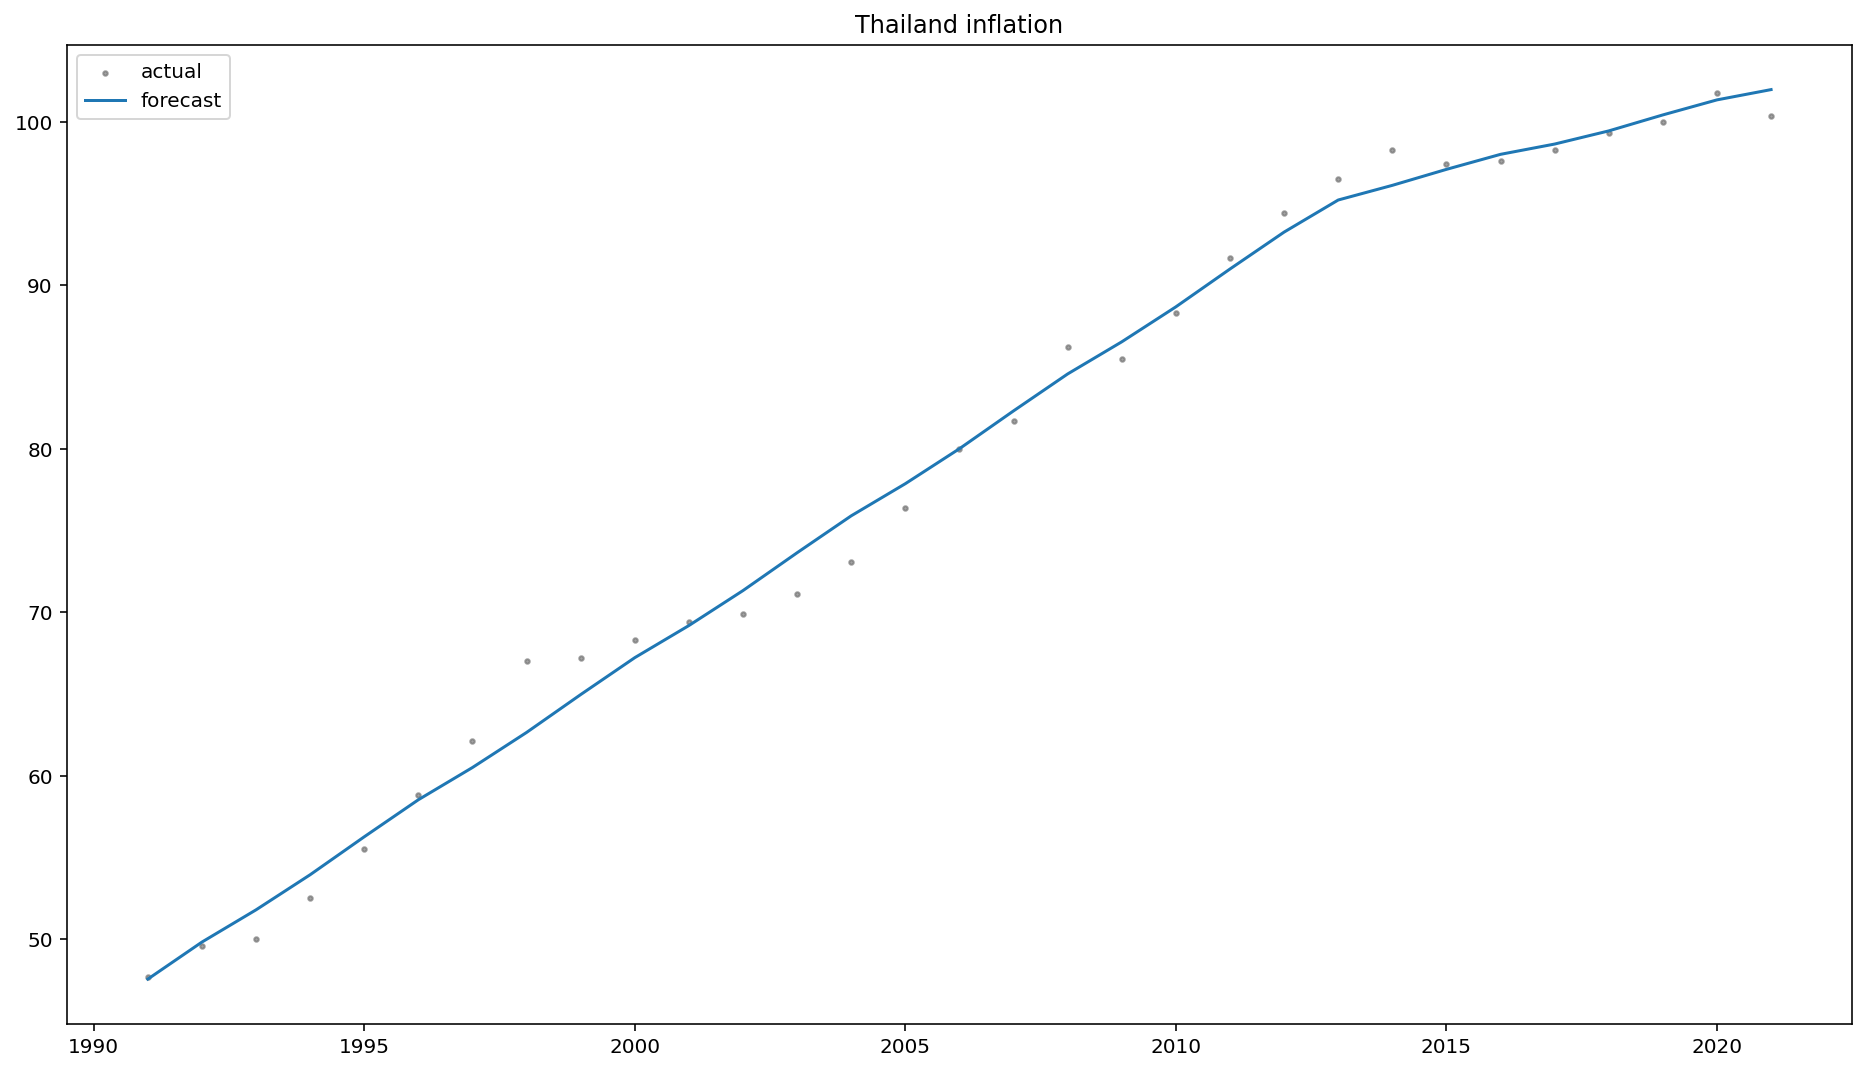

In [55]:
plt.figure(figsize=(16,9))
plt.scatter(inflation_prophet['year'], inflation_prophet['y'], color='.4', label='actual', s=5, alpha=.6)
plt.plot(inflation_prophet['year'], inflation_prophet['yhat'], label='forecast')
plt.title(f'Thailand {y2_col}')
plt.legend()

แสดงผลกราฟเปรียบเทียบอัตราเงินเฟ้อและจากการคาดการณ์พบว่าแนวโน้มไปในทิศทางเดียวกัน 

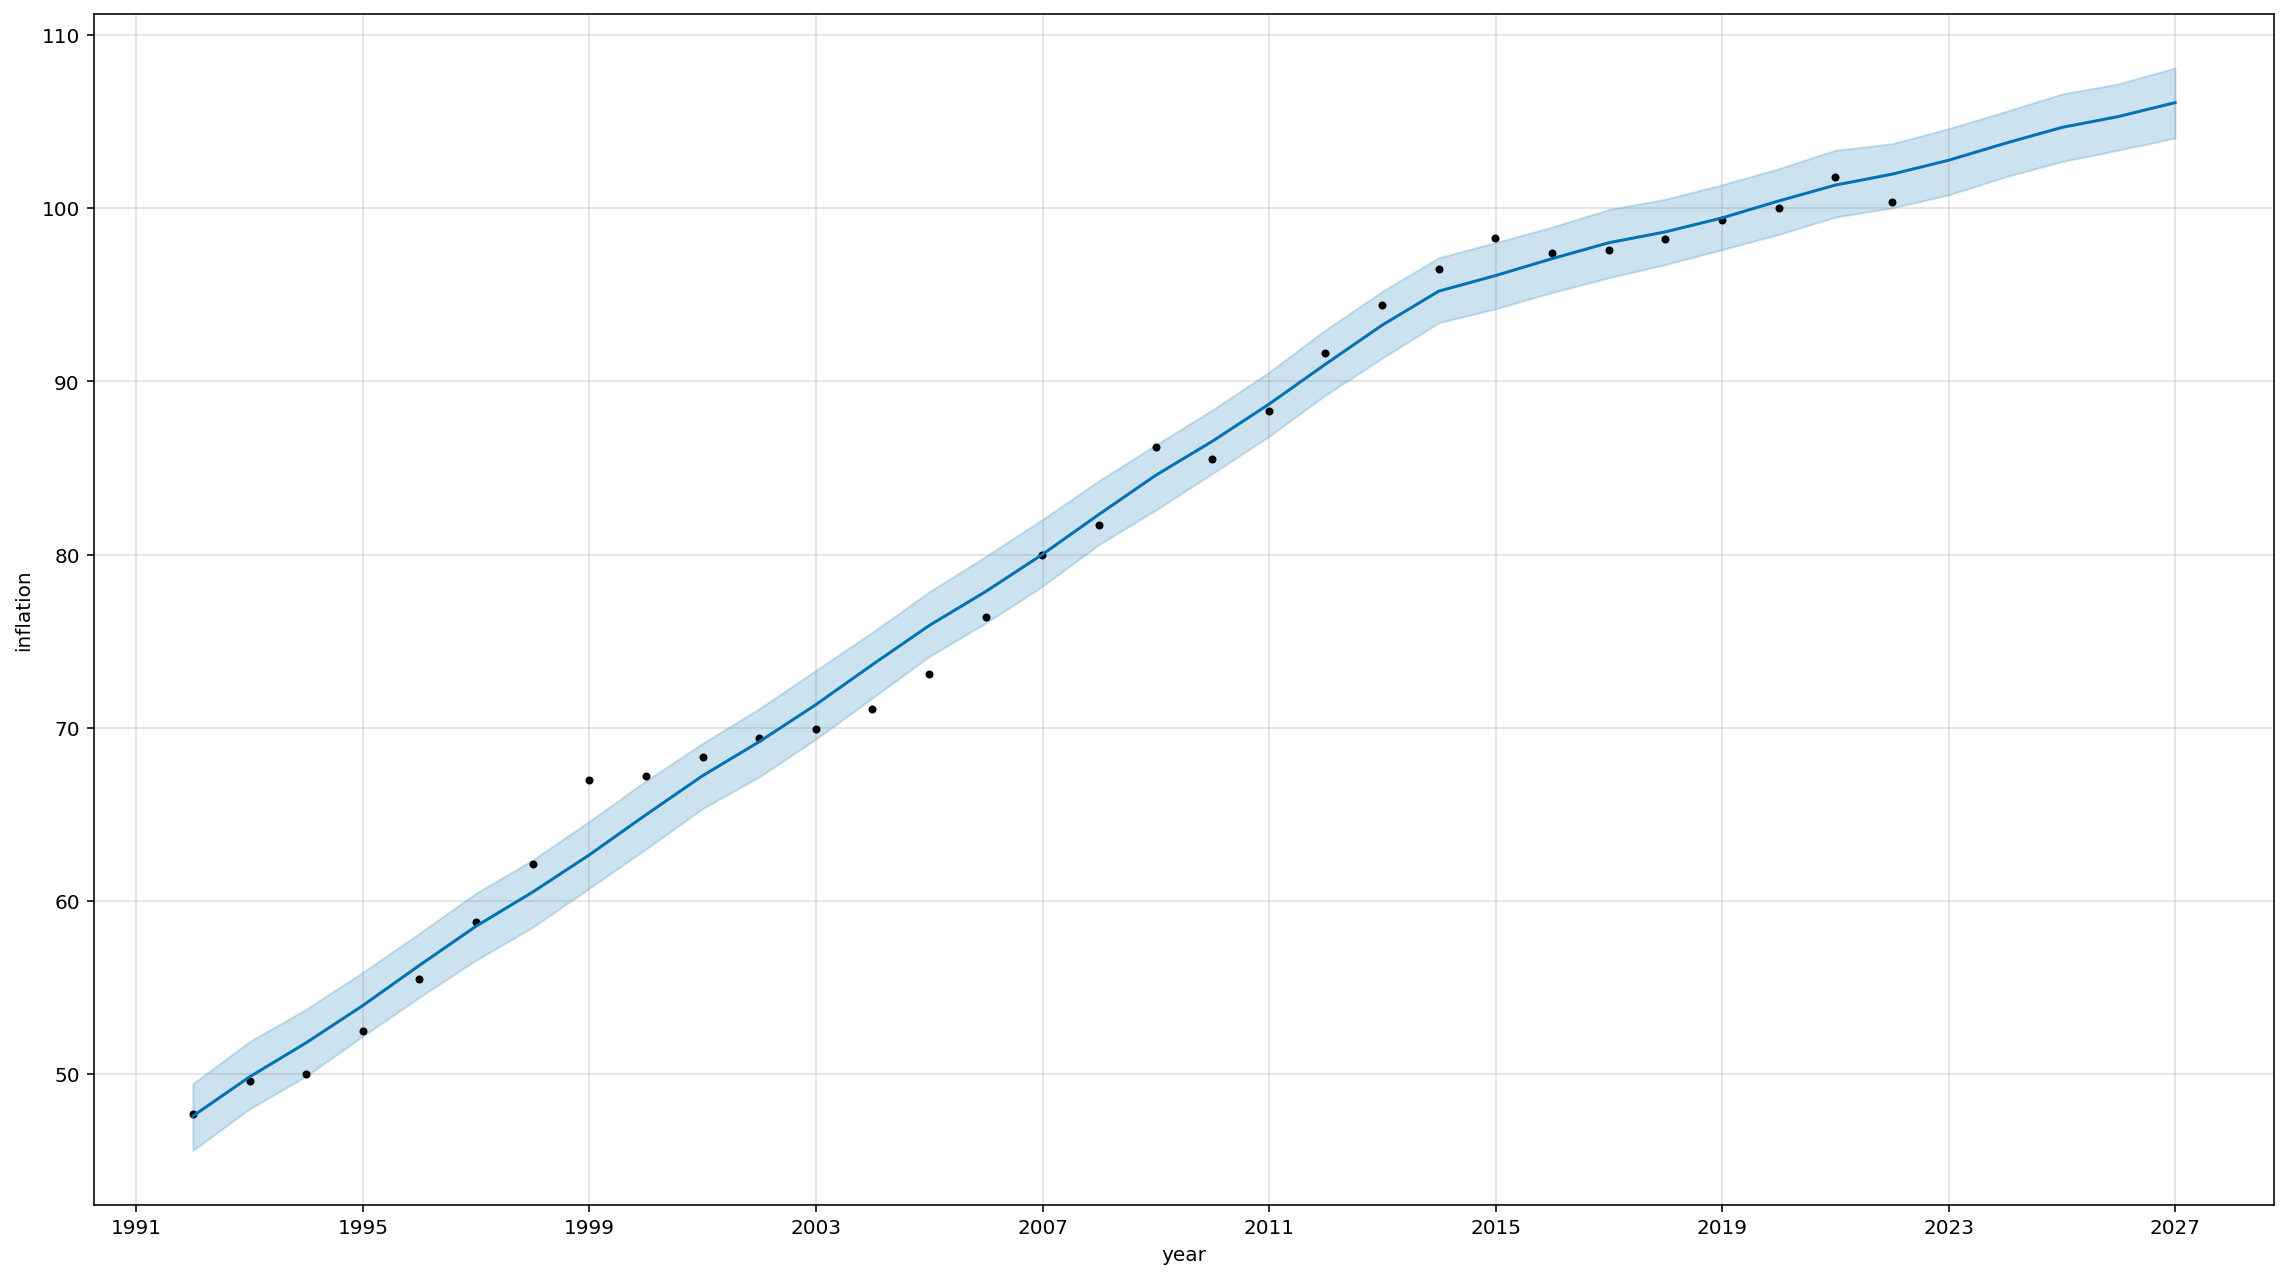

In [56]:
fig = model.plot(forecast2, uncertainty=True, figsize=(16, 9), xlabel='year', ylabel=y2_col)

จาก model จะเห็นได้ว่า model ในการคาดการณ์ค่าเงินเฟ้อมีความแม่นยำค่อนข้างสูงเมื่อเทียบจากข้อมูลจริง

## <div style = "background-color:#6b705c;padding:10px;"><span style="color:lavender"><b>คาดการณ์ค่าเงินเฟ้อโดยใช้ราคาน้ำมันสำเร็จรูปในอนาคต</b></span></div>

สร้าง model โดยใช้ train data คือราคาน้ำมันดีเซล(diesel price) และค่าเงินเฟ้อ(inflation) ในปี 1991-2021 และใช้ test data เป็นราคาน้ำมันดีเซล(diesel price) ที่ได้มากจากการคาดการณ์โดยใช้ Prophet model ในปี 2022-2026 มาคาดการณ์ค่าเงินเฟ้อ(inflation) ในปี 2022-2026

In [57]:
df5 = pd.concat([p_price_ey, inflation_ey.drop('year', axis=1)], axis=1)
df5[:5]

,year,diesel_price,inflation
0,1991-12-31,8.03,47.7
1,1992-12-31,7.83,49.6
2,1993-12-31,7.84,50.0
3,1994-12-31,7.39,52.5
4,1995-12-31,7.57,55.5


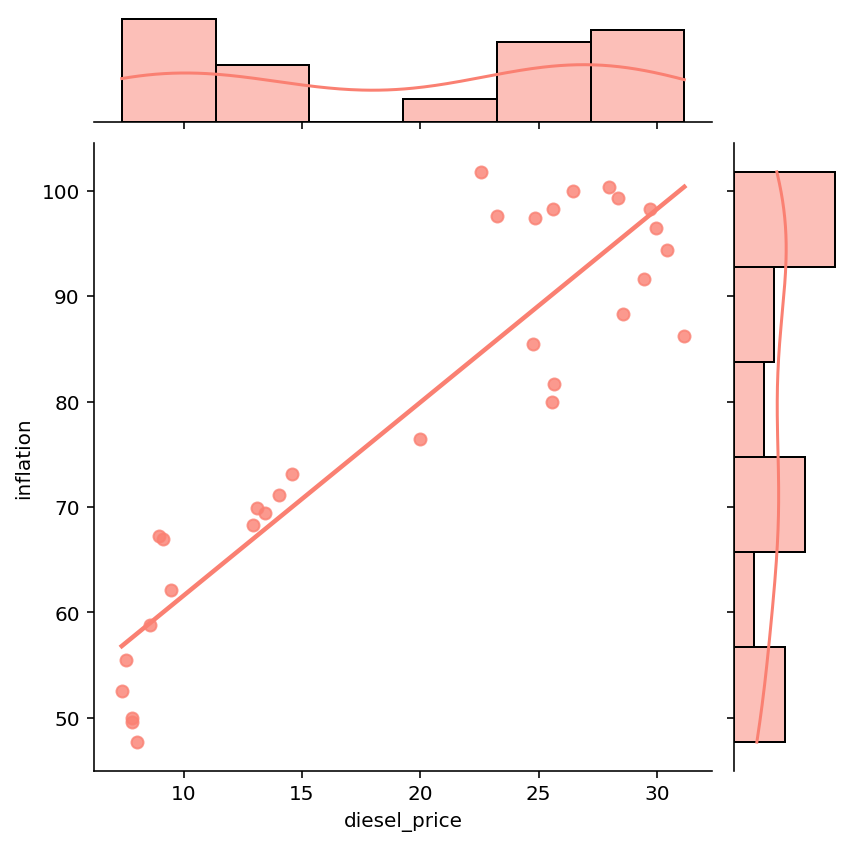

In [58]:
sns.jointplot(x='diesel_price', y='inflation', data=df5, kind='reg', ci=None, color='salmon')

จากกราฟจะเห็นได้ว่าความสัมพันธ์ของราคาน้ำมันสำเร็จรูปและค่าเงินเฟ้อในภาพรวมค่อนข้างไปในทิศทางเดียวกันแต่ไม่ได้เห็นได้ชัดเจนมากนัก เพราะมีข้อมูลบางส่วนที่กระจายตัวออกมาจาก trend line

## สร้างโมเดล (LinearRegression)

In [59]:
model = LinearRegression()
model

LinearRegression()

In [60]:
X = df5[['diesel_price']] 
y = df5['inflation']

In [61]:
model.fit(X, y)

LinearRegression()

In [62]:
model.score(X, y)

0.8329265532156666

## คาดการณ์ค่าเงินเฟ้อ

ดึง y-hat (ค่าที่คาดการณ์) ของราคาน้ำมันสำเร็จรูป เฉพาะปีที่เป็น future predicted เพื่อมาเป็นตัว test ใน linear model

In [63]:
dfcst_diesel2 = dfcst_diesel[(dfcst_diesel['ds'].dt.year > 2021)] 
dfcst_diesel2

,ds,yhat,yhat_lower,yhat_upper
31,2022-12-31,33.018583,27.794117,38.196231
32,2023-12-31,33.906038,28.553173,39.377668
33,2024-12-31,34.363894,28.764609,39.756622
34,2025-12-31,35.443113,29.896392,41.134828
35,2026-12-31,36.426538,30.998290,42.222710


In [64]:
y_diesel = dfcst_diesel2[['yhat']]
y_diesel = y_diesel.reset_index()
y_diesel.drop('index', axis=1, inplace=True)
y_diesel

,yhat
0,33.018583
1,33.906038
2,34.363894
3,35.443113
4,36.426538


In [65]:
model.predict(y_diesel)

c:\Users\User\miniconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- yhat
Feature names seen at fit time, yet now missing:
- diesel_price

  warnings.warn(message, FutureWarning)


array([103.76988221, 105.39603654, 106.23500371, 108.2125427 ,
       110.01454977])

In [66]:
inflation_linear = pd.DataFrame(model.predict(y_diesel))
inflation_linear.columns = ['linear']
inflation_linear

c:\Users\User\miniconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- yhat
Feature names seen at fit time, yet now missing:
- diesel_price

  warnings.warn(message, FutureWarning)


,linear
0,103.769882
1,105.396037
2,106.235004
3,108.212543
4,110.014550


In [67]:
dfcst_inflation2 = dfcst_inflation[(dfcst_inflation['ds'].dt.year > 2021)] 
dfcst_inflation2

,ds,yhat,yhat_lower,yhat_upper
31,2022-12-31,102.771746,100.772170,104.599533
32,2023-12-31,103.749819,101.805915,105.580719
33,2024-12-31,104.668995,102.694956,106.599484
34,2025-12-31,105.297987,103.358116,107.189079
35,2026-12-31,106.101998,104.050069,108.105441


In [68]:
inflation_prophet = dfcst_inflation2[['ds', 'yhat']]
inflation_prophet = inflation_prophet.reset_index()
inflation_prophet.drop('index', axis=1, inplace=True)
inflation_prophet['ds'] = inflation_prophet['ds'].dt.year
inflation_prophet.rename(columns={'ds':'year', 'yhat':'prophet'}, inplace=True)
inflation_prophet

,year,prophet
0,2022,102.771746
1,2023,103.749819
2,2024,104.668995
3,2025,105.297987
4,2026,106.101998


## เปรียบเทียบค่าที่ได้

เปรียบเทียบค่าเงินเฟ้อที่คาดการณ์ได้ โดยใช้ Facebook prophet เทียบกับ model linear regression

In [69]:
future_inflation = pd.concat([inflation_prophet, inflation_linear], axis=1)
future_inflation

,year,prophet,linear
0,2022,102.771746,103.769882
1,2023,103.749819,105.396037
2,2024,104.668995,106.235004
3,2025,105.297987,108.212543
4,2026,106.101998,110.014550


เมื่อเปรียบเทียบทั้ง 2 model แล้วจะเห็นได้ว่าค่าเงินเฟ้อที่คาดการณ์ได้จาก Facebook Prophet และ Linear Regression มีความแตกต่างกันเล็กน้อย แต่แนวโน้มโดยรวมแล้วถือว่าเป็นไปในทิศทางเดียวกัน
ซึ่ง Facebook Prophet เป็นการคาดการณ์ค่าเงินเฟ้อในอนาคตโดยใช้เพียงช่วงเวลาและค่าเงินเฟ้อปัจจุบันในการคำนวณ ส่วน Linear Regression จะเป็นการนำราคาน้ำมันสำเร็จรูปมาเป็นตัวแปรในการคาดการณ์ค่าเงินเฟ้อ และนำราคาน้ำมันสำเร็จรูปในอนาคตที่คาดการณ์โดยใช้ Facebook Prophet มาเป็นตัว test เพื่อคาดการณ์ค่าเงินเฟ้อในอนาคต
การคาดการณ์ค่าเงินเฟ้อในอนาคตทั้ง 2 model นี้จึงเป็นเพียงการคาดการณ์จากช่วงเวลา และใช้ราคาน้ำมันสำเร็จรูปมาคาดการณ์ ซึ่งความเป็นจริงแล้วย่อมมีปัจจัยอื่นๆ อีก จึงไม่สามารถสรุปถึงความแม่นยำของทั้ง 2 model ได้อย่างแน่ชัด

## <div style = "background-color:#6b705c;padding:10px;"><span style="color:lavender"><b>อ้างอิง</b></span></div>
เงินเฟ้อ
- Inflation, GDP deflator (annual %). (ม.ป.ป.). [ออนไลน์]. ได้จาก : https://data.worldbank.org/indicator/NY.GDP.DEFL.KD.ZG [สืบค้นเมื่อวันที่ 5 พฤษภาคม 2565].

ราคาน้ำมัน
- ราคาสินค้าอุตสาหกรรมที่สำคัญ.(29 เม.ย. 2565). [ออนไลน์]. ได้จาก : https://www.bot.or.th/App/BTWS_STAT/statistics/BOTWEBSTAT.aspx?reportID=90&language=TH [สืบค้นเมื่อวันที่ 5 พฤษภาคม 2565].

- ราคาย้อนหลังของ Dubai Crude Oil (Platts) Financial Futures. (ม.ป.ป.). [ออนไลน์]. ได้จาก : https://th.investing.com/commodities/dubai-crude-oil-platts-futures-historical-data [สืบค้นเมื่อวันที่ 5 พฤษภาคม 2565].

- OPEC Total Spare Crude Oil Production Capacity, Monthly. (ม.ป.ป.). [ออนไลน์]. ได้จาก : https://www.eia.gov/opendata/qb.php?category=1039872&sdid=STEO.COPS_OPEC.M [สืบค้นเมื่อวันที่ 5 พฤษภาคม 2565].

ราคาทอง 
- เปรียบเทียบราคาทองตั้งแต่ปี 2554 ถึงปีปัจจุบัน. (ม.ป.ป.). [ออนไลน์]. ได้จาก : https://ทองคําราคา.com/เปรียบเทียบราคาทองปี-55-56-57-และ-58/ [สืบค้นเมื่อวันที่ 5 พฤษภาคม 2565].

ค่าเงินบาทย้อนหลัง
- อัตราแลกเปลี่ยนย้อนหลัง USD/THB. [ออนไลน์]. ได้จาก : https://th.investing.com/currencies/usd-thb-historical-data [สืบค้นเมื่อวันที่ 5 พฤษภาคม 2565].